In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score


## Read Data

In [2]:
data_name = "transformed_business"
# data_name = "dummy_object"
df = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_copy = df.copy()
df_copy.head()

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,25,235,1,neutral or dissatisfied
1,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,26,1142,0,satisfied
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,25,562,11,neutral or dissatisfied
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,61,214,0,satisfied
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,52,2035,4,satisfied


<Axes: xlabel='satisfaction', ylabel='count'>

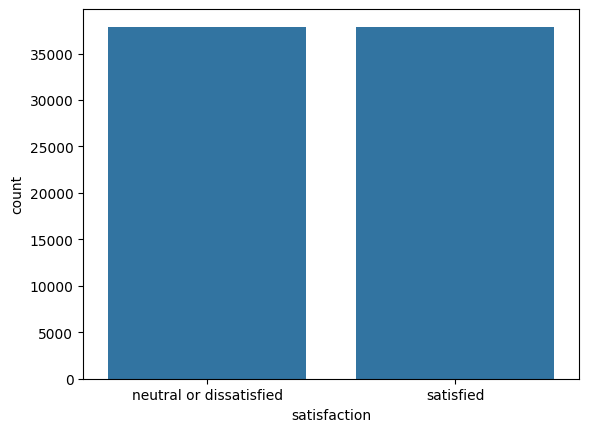

In [3]:
import seaborn as sns
sns.countplot(x="satisfaction", data=df_copy)

## Train-Test Splitting

In [4]:
X= df_copy.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,0,1,25,235,1
1,0,0,1,0,0,0,0,0,1,0,...,0,1,1,0,1,0,1,26,1142,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,25,562,11
3,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,1,61,214,0
4,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,52,2035,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75775,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,26,1127,0
75776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,28,1532,0
75777,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,38,3496,3
75778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,31,1919,0


In [5]:
y = df_copy.iloc[:,-1]
y

0        neutral or dissatisfied
1                      satisfied
2        neutral or dissatisfied
3                      satisfied
4                      satisfied
                  ...           
75775    neutral or dissatisfied
75776    neutral or dissatisfied
75777    neutral or dissatisfied
75778    neutral or dissatisfied
75779    neutral or dissatisfied
Name: satisfaction, Length: 75780, dtype: object

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (53046, 77) and test set is :(22734, 77)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[-0.17498508, -0.40604592, -0.49105237, ...,  0.01405142,
        -0.01520397, -0.53212404],
       [-0.17498508, -0.40604592,  2.03644268, ..., -0.90483687,
         0.72642375,  3.31612533],
       [-0.17498508,  2.46277561, -0.49105237, ..., -0.90483687,
         0.06365489, -0.53212404],
       ...,
       [-0.17498508,  2.46277561, -0.49105237, ..., -0.44539273,
         0.61655298,  1.32073677],
       [-0.17498508,  2.46277561, -0.49105237, ..., -1.36428102,
         0.81591527, -0.53212404],
       [-0.17498508, -0.40604592, -0.49105237, ..., -0.52196675,
        -0.64784698, -0.53212404]])

## Set paramiter CV

In [8]:
# ทำ Cross Validation
k_folds = 15  # จำนวน k-folds 

## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='gini', splitter='best',max_features=6,random_state=1234)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_dt.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_DT = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.433515 วินาที


In [10]:

#Predict the accuracy of the model
y_pred_dt=model_dt.predict(X_test)

accuracy_DT=accuracy_score(y_pred_dt,y_test)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")

report=classification_report(y_test,y_pred_dt)
print("Classification Report is : \n",report)

Accuracy of Decision Tree is : 95.36 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.96      0.95     11333
              satisfied       0.96      0.95      0.95     11401

               accuracy                           0.95     22734
              macro avg       0.95      0.95      0.95     22734
           weighted avg       0.95      0.95      0.95     22734



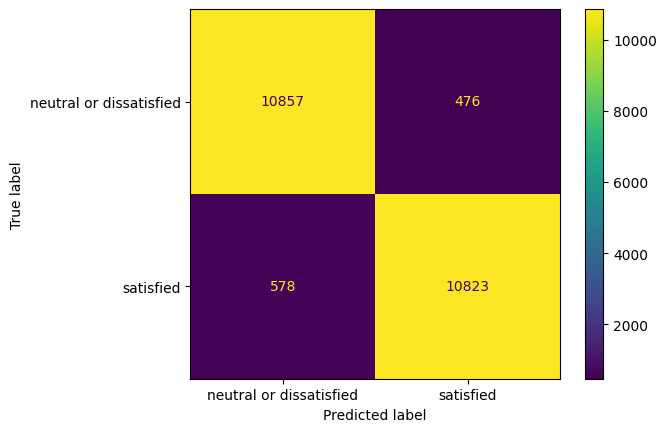

In [11]:
cm_2= confusion_matrix(y_test, y_pred_dt, labels=model_dt.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_dt.classes_)
disp_2.plot()

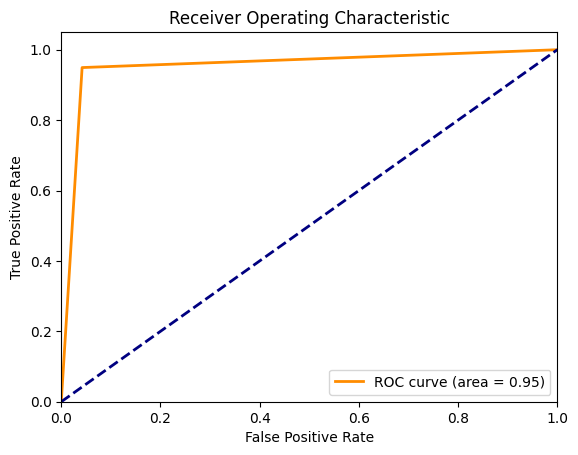

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# แปลง y_test เป็นค่าตัวเลข
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# ทำนายโอกาสของแต่ละ class
y_prob = model_dt.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob)
roc_auc = auc(fpr, tpr)

# แสดงกราฟ ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
start_time_cv = time.time()  # เวลาเริ่มต้นสำหรับ cross-validation
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=k_folds, scoring='accuracy')
end_time_cv = time.time()  # เวลาสิ้นสุดสำหรับ cross-validation

# แสดงผล Cross Validation Scores
print(f"Cross Validation Scores (Decision Tree): {cv_scores_dt}")
print(f"Mean CV Accuracy: {np.mean(cv_scores_dt):.4f}")
print(f"Standard Deviation CV Accuracy: {np.std(cv_scores_dt):.4f}")

# คำนวณเวลาที่ใช้ในการทำ Cross Validation
cv_time_DT = end_time_cv - start_time_cv
print(f"เวลาที่ใช้ในการทำ Cross Validation: {cv_time_DT:.6f} วินาที")


Cross Validation Scores (Decision Tree): [0.94515126 0.94317218 0.94204128 0.94571671 0.94458581 0.95250212
 0.95673077 0.95277149 0.94315611 0.94994344 0.95871041 0.95559955
 0.94739819 0.95277149 0.94966063]
Mean CV Accuracy: 0.9493
Standard Deviation CV Accuracy: 0.0052
เวลาที่ใช้ในการทำ Cross Validation: 2.359157 วินาที


In [14]:
# การประเมินผล
train_accuracy = accuracy_score(y_train, model_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, model_dt.predict(X_test))

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.9536377232339227


## Save Model Predic

In [15]:
import pickle
pickle_out = open("../../pipelines/model_DT_business.pkl", mode = "wb")
pickle.dump(model_dt, pickle_out)
pickle_out.close()

with open('../../pipelines/scaler_DT.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Load Model Predic

In [16]:
import pickle
df_t = pd.read_csv(f"../../datasets/data_{data_name}.csv")
df_sam = df_t.sample(20)
df_sam

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes,satisfaction
71711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,36,258,0,neutral or dissatisfied
75063,0,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,1,23,1925,0,neutral or dissatisfied
15533,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,59,2727,15,neutral or dissatisfied
34598,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,35,224,0,neutral or dissatisfied
6339,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,41,1389,0,satisfied
39315,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,40,2984,26,satisfied
15345,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,48,1934,0,satisfied
49288,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,66,3700,0,satisfied
57237,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,42,353,0,neutral or dissatisfied
49353,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,46,1464,0,satisfied


In [17]:

X_sam= df_sam.iloc[:,:-1]
X_sam


,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Ease of Online booking_0,Ease of Online booking_1,Ease of Online booking_2,Ease of Online booking_3,...,Cleanliness_4,Cleanliness_5,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Age,Flight Distance,Departure Delay in Minutes
71711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,36,258,0
75063,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,23,1925,0
15533,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,59,2727,15
34598,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,35,224,0
6339,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,41,1389,0
39315,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,40,2984,26
15345,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,48,1934,0
49288,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,66,3700,0
57237,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,42,353,0
49353,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,46,1464,0


In [18]:
y_sam = df_sam.iloc[:,-1]
y_sam


71711    neutral or dissatisfied
75063    neutral or dissatisfied
15533    neutral or dissatisfied
34598    neutral or dissatisfied
6339                   satisfied
39315                  satisfied
15345                  satisfied
49288                  satisfied
57237    neutral or dissatisfied
49353                  satisfied
44128    neutral or dissatisfied
28631                  satisfied
14292                  satisfied
26644    neutral or dissatisfied
41013                  satisfied
71652    neutral or dissatisfied
58583    neutral or dissatisfied
4112                   satisfied
43057                  satisfied
17367                  satisfied
Name: satisfaction, dtype: object

In [19]:
model = pickle.load(open("../../pipelines/model_DT_business.pkl", 'rb'))
scaler_DT = pickle.load(open("../../pipelines/scaler_DT.pkl", 'rb'))

scaler_new = scaler_DT.transform(X_sam)
preds = model.predict(scaler_new)
print(preds)
accuracy_DT=accuracy_score(preds,y_sam)
print(f"Accuracy of DT is : {round(accuracy_DT*100,2)} % .")

['neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'neutral or dissatisfied' 'satisfied'
 'satisfied' 'satisfied' 'satisfied' 'neutral or dissatisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied'
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied' 'satisfied']
Accuracy of DT is : 100.0 % .
